KL Divergence (Data Drift Measure): 0.3968
⚠️ Significant Data Drift Detected


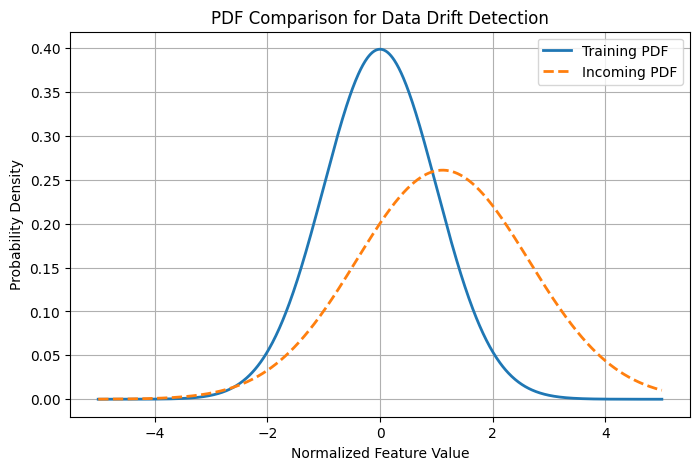

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, entropy
from sklearn.preprocessing import StandardScaler

# -------------------------------
# 1. Generate synthetic datasets
# -------------------------------

np.random.seed(42)

# Reference (training) data
train_data = np.random.normal(loc=50, scale=10, size=1000)

# Incoming data (with drift)
test_data = np.random.normal(loc=60, scale=15, size=1000)

# -------------------------------
# 2. Normalize data
# -------------------------------

scaler = StandardScaler()
train_norm = scaler.fit_transform(train_data.reshape(-1, 1)).flatten()
test_norm = scaler.transform(test_data.reshape(-1, 1)).flatten()

# -------------------------------
# 3. Estimate PDFs
# -------------------------------

x = np.linspace(-5, 5, 1000)

pdf_train = norm.pdf(x, np.mean(train_norm), np.std(train_norm))
pdf_test = norm.pdf(x, np.mean(test_norm), np.std(test_norm))

# -------------------------------
# 4. Drift detection using KL divergence
# -------------------------------

kl_divergence = entropy(pdf_train, pdf_test)

print(f"KL Divergence (Data Drift Measure): {kl_divergence:.4f}")

if kl_divergence > 0.1:
    print("⚠️ Significant Data Drift Detected")
else:
    print("✅ No Significant Data Drift")

# -------------------------------
# 5. Visualization
# -------------------------------

plt.figure(figsize=(8, 5))
plt.plot(x, pdf_train, label='Training PDF', linewidth=2)
plt.plot(x, pdf_test, label='Incoming PDF', linewidth=2, linestyle='--')
plt.title("PDF Comparison for Data Drift Detection")
plt.xlabel("Normalized Feature Value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()
